# Prosper Loan Data
## by Pin

## Preliminary Wrangling

> This dataset is a data set of a loan request made on the prosper platform. The detail of the loan are describe in the dataset such as how much it was borrowed, the rate that the borrower pay, the status and time of the payment. The dataset mainly focuses on the characteristic of each loan that were requested in the platform.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='#', api_key='#')


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [52]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The structure of the dataset is one line of the data represent the detail of loan the borrower takes. Each column describe the characteristic of the loan

### What is/are the main feature(s) of interest in your dataset?

> Main feature that I'm  interest in is the credit grades, the prosper credit given to the loan and the default probability. I'm also interested in finding the rates that the borrower get from the investor and their characteristic, how is it effecting the interest rate granted.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Credit Grade of prosper and the market, the character that are provided in the dataset such as borrower APR, State, Occupation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [53]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### See the variation of the credit grading in the data

In [55]:
#Transform rating into categorical

rating=['AA','A','B','C','D','E','HR','NC']

rating_order=pd.api.types.CategoricalDtype(ordered=True,categories=rating)
df['CreditGrade']=df['CreditGrade'].astype(rating_order);
df['ProsperRating (Alpha)']=df['ProsperRating (Alpha)'].astype(rating_order);


In [56]:
base=sb.color_palette()[2]

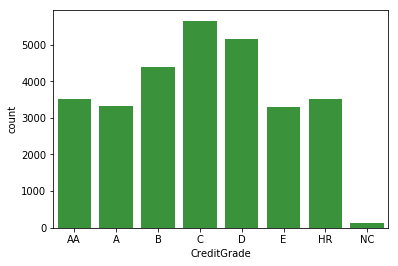

In [57]:
sb.countplot(data=df,x='CreditGrade',color=base)

([<matplotlib.axis.XTick at 0x26a65db9898>,
 <a list of 7 Text xticklabel objects>)

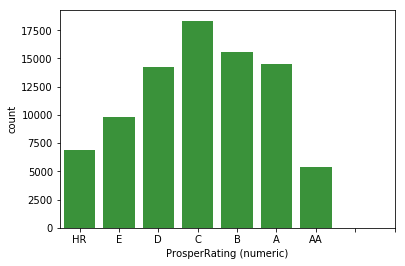

In [58]:
sb.countplot(data=df,x='ProsperRating (numeric)',color=base)
ticks=[0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
labels=['HR','E','D','C','B','A','AA']
plt.xticks(ticks,labels)

#The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
# 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. 

' Same dataset as above but just different orders'

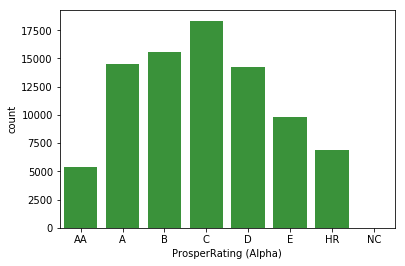

In [59]:
sb.countplot(data=df,x='ProsperRating (Alpha)',color=base)

""" Same dataset as above but just different orders"""

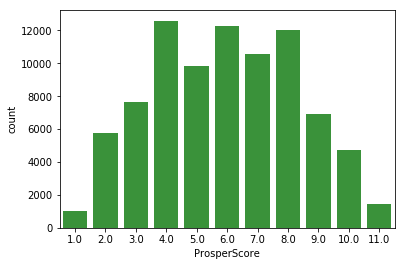

In [60]:
sb.countplot(data=df,x='ProsperScore',color=base)

#### Is the loan given per year difer?

In [61]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [62]:
""" Converting it to date time"""

df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])

In [63]:
df['year']=df['ListingCreationDate'].dt.year

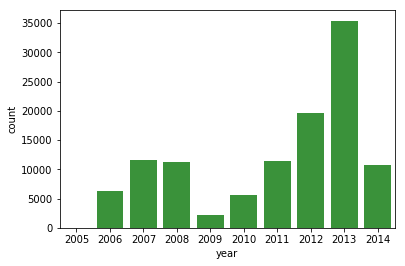

In [64]:
sb.countplot(data=df,x='year',color=base)

#### See distribution of the term is it different?

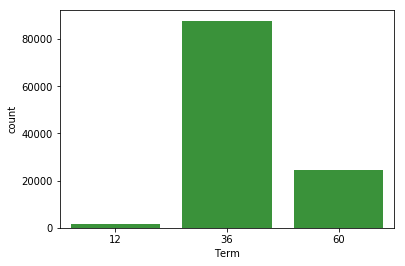

In [65]:
sb.countplot(data=df,x='Term',color=base)

#most loan originate is only 3 yr.. some are 5 yr 

#### See loan status

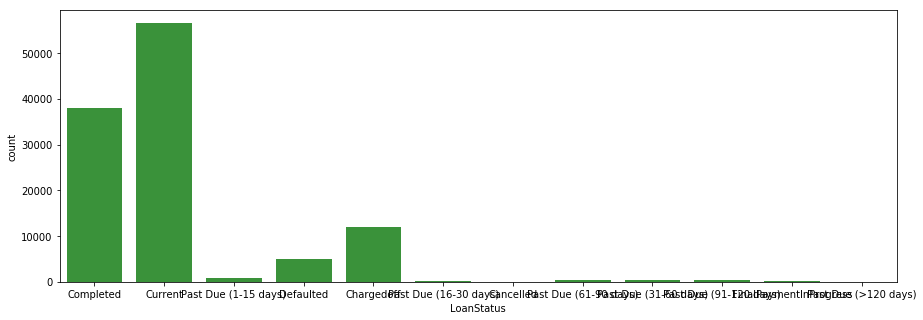

In [66]:
plt.figure(figsize=(15,5))
sb.countplot(data=df,x='LoanStatus',color=base)

The default and pass due in the pllatform are not much different

#### Loan Characters

#### Want to know the characteristic of the loan made on the platform

ploting loan amount

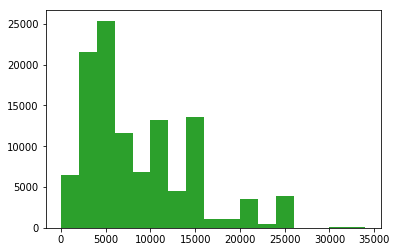

In [67]:
bins=np.arange(0,35000,2000)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins,color=base);

Most loan are very small amount



#### What is the loan used for? 

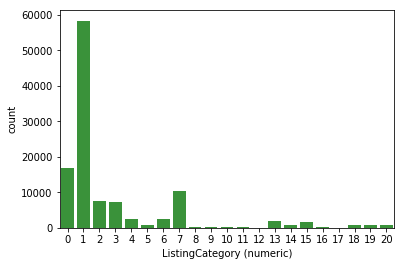

In [68]:
sb.countplot(data=df,x='ListingCategory (numeric)',color=base)

Most are for debt consolidation???which mean most are use for paying of other debt
The other are not available and others

#### Borrower Characters

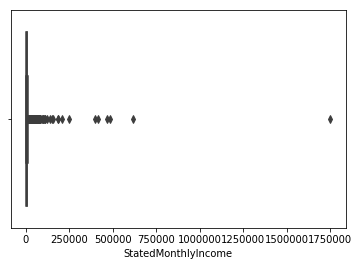

In [69]:
sb.boxplot(data=df,x='StatedMonthlyIncome',color=base)

there's a outlier in this case - query to see the outlier

In [70]:
df[df['StatedMonthlyIncome']==df['StatedMonthlyIncome'].max()].loc[:,'BorrowerState':'StatedMonthlyIncome']

,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,...,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
53167,OR,Professional,Self-employed,114.0,True,False,NaN,2012-02-20 12:53:40,740.0,759.0,...,42855.0,0.61,26168.0,33.0,1.0,0.0,NaN,"$100,000+",False,1.750003e+06


Drop this to see the range of others

(0, 75000)

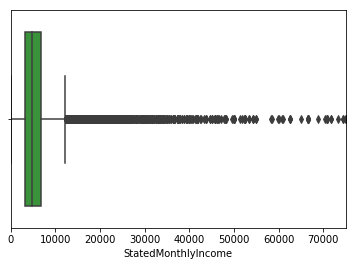

In [71]:
sb.boxplot(data=df,x='StatedMonthlyIncome',color=base)
plt.xlim(0,75000)

Investor Debt to income ratio

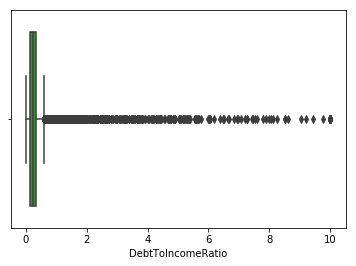

In [72]:
sb.boxplot(data=df,x='DebtToIncomeRatio',color=base)

Number of time they take loan

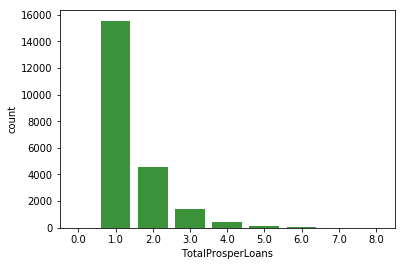

In [73]:
sb.countplot(data=df,x='TotalProsperLoans',color=base)

Occupation distribution

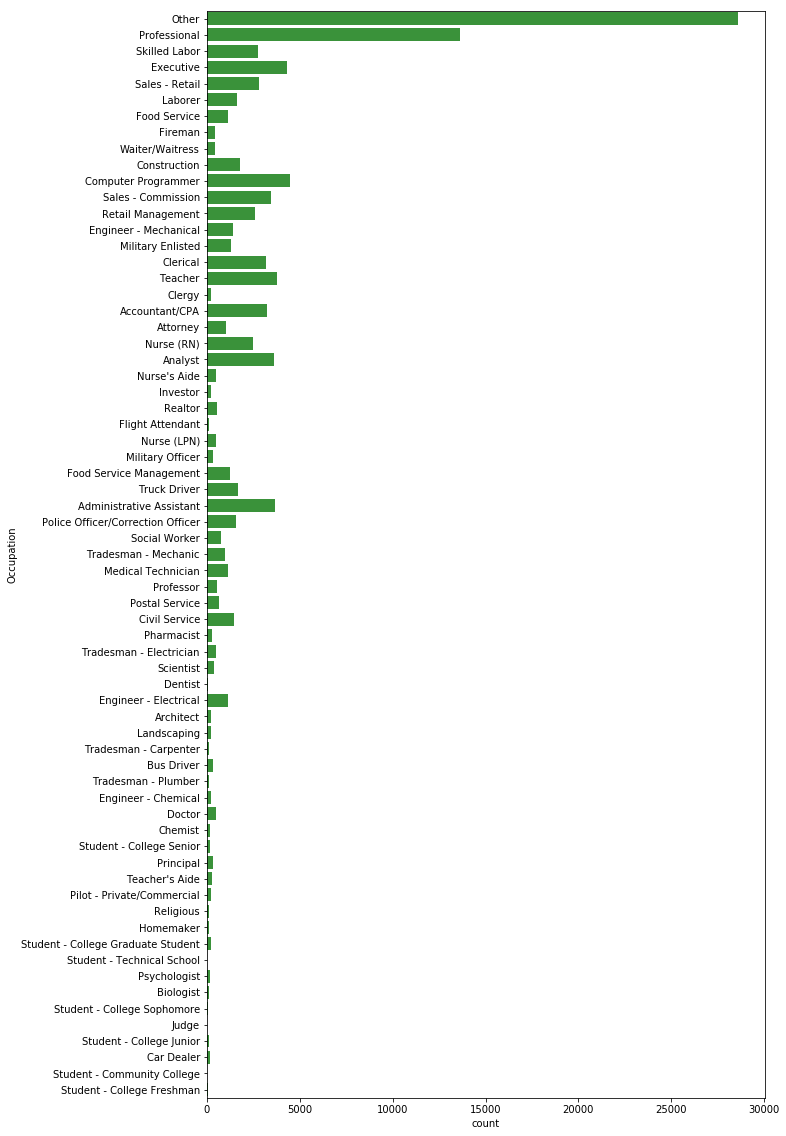

In [74]:
plt.figure(figsize=(10,20))
sb.countplot(data=df,y='Occupation',color=base)


In [75]:
df_clean=df.copy()

Group occupation into category for easier analysis:

In [76]:
df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Student - College Graduate Student','Student - Technical School','Student - College Sophomore',
      'Student - College Junior', 'Student - Community College','Student - College Freshman','Student - College Senior'
     ]],'Student')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Teacher\'s Aide','Principal','Professor','Teacher'
     ]],'Educator')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Nurse\'s Aide','Medical Technician','Nurse (RN)','Nurse (LPN)','Pharmacist','Dentist','Doctor','Psychologist','Social Worker'
     ]],'Health care professional')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Engineer - Electrical','Biologist','Engineer - Mechanical','Scientist','Chemist','Engineer - Chemical'
     ]],'Science related')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Tradesman - Mechanic','Tradesman - Electrician','Tradesman - Carpenter','Tradesman - Plumber'
     ]],'Tradesman')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Truck Driver','Bus Driver'
     ]],'Driver')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Judge','Attorney'
     ]],'Law professional')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Military Officer','Police Officer/Correction Officer','Military Enlisted','Civil Service','Fireman']]
    , 'Government jobs')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Realtor','Landscaping','Architect']]
    , 'Real Estate')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Waiter/Waitress','Homemaker','Laborer']]
    , 'Blue collar worker')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Clergy','Religious']]
    , 'Religion related')


df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Flight Attendant','Pilot - Private/Commercial']]
    , 'Aerospace')

df_clean['Occupation']=df_clean['Occupation'].replace(
    [['Analyst','Investor']]
    , 'Finance related')

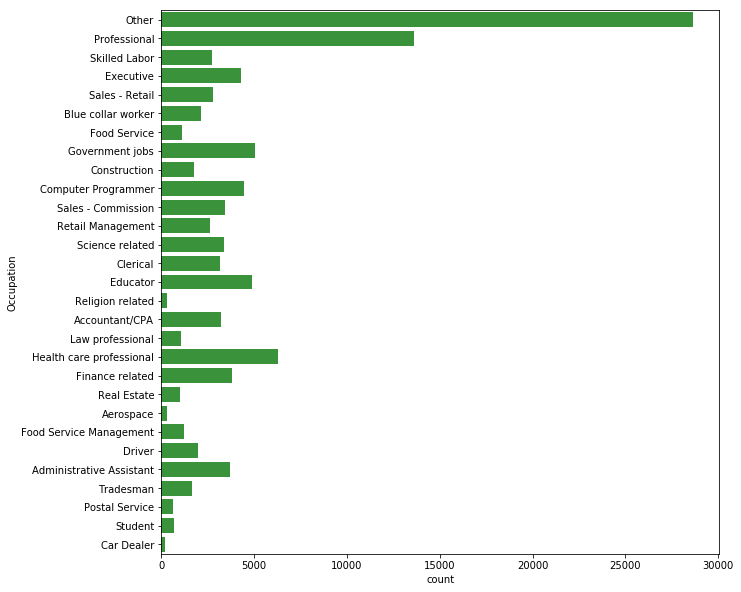

In [77]:
plt.figure(figsize=(10,10))
sb.countplot(data=df_clean,y='Occupation',color=base)



'DebtToIncomeRatio','TotalProsperLoans',
StatedMonthlyIncome

borrower profile : occupation
can monthly borrow cover the amount $ people have as salary??


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. First explore the credit grading data -- didn't find anything off, the loan that they give most are in C grade 
2. Loan given per year -- Most year that the loan was orignated was 2013
3. Distribution of term is mostly given loan at 36 month
4. Most loan status are complete or current, not much are in a danger zone
5. Loan amount that the platform love to give is a low loan amount
6. Loan are mostly use for Loan consolidation
7. People are having an income range lower than 10,000 monthly , and debt to income ratio below 1. While most people on the pltform only have 1 loan with the platform
8. Professional occupation make most loan in platform


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. Change data form of the rating category - so its can order from best rating to worst. Did this for 2 data - CreditGrade and Prosper Rating
2. There's no year data so have to make a transformation on the data set to create a year column using .to_datetime
3. Categorize the occupation into a wider category to lower the complexity in understanding the data


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### See most average amount borrowed category

cutting loan into amount category for easier intepretation

In [78]:
df_clean['Amount_chunk']=pd.cut(df_clean['LoanOriginalAmount'],bins=bins,labels=False)

In [79]:
amountc=df_clean.groupby(df_clean['ListingCategory (numeric)'])['Amount_chunk'].mean().sort_values()

In [80]:
amountc=amountc.reset_index()

In [81]:
amountc.head()

,ListingCategory (numeric),Amount_chunk
0,5,1.142857
1,4,1.654280
2,6,1.798133
3,13,1.864594
4,19,1.906128


In [82]:
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[0,7
     ]],'Others')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[1
     ]],'Debt Consolidation')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[2
     ]],'Home Improvement')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[3,12
     ]],'Business')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[4
     ]],'Personal Loan')

amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[5
     ]],'Student Use')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[6,9,16
     ]],'Vehicle')

amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[8,13,10
     ]],'General house expense')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[20,11
     ]],'Wedding and related')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[14
     ]],'Large Purchases')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[15
     ]],'Medical/Dental')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[17
     ]],'RV')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[18
     ]],'Taxes')
amountc['ListingCategory (numeric)']=amountc['ListingCategory (numeric)'].replace(
    [[19
     ]],'Vacation')

In [83]:
amountc.head()

,ListingCategory (numeric),Amount_chunk
0,Student Use,1.142857
1,Personal Loan,1.654280
2,Vehicle,1.798133
3,General house expense,1.864594
4,Vacation,1.906128


C:\Users\copter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



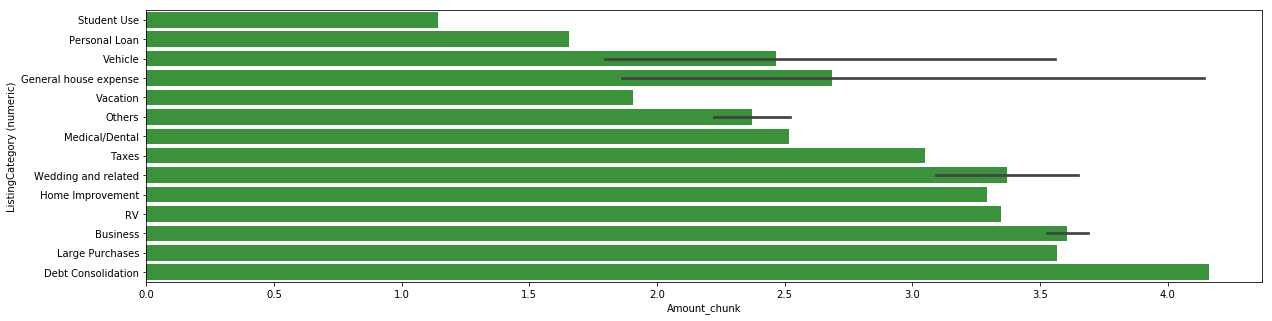

In [84]:
plt.figure(figsize=(20,5))
sb.barplot(data=amountc,x='Amount_chunk',y='ListingCategory (numeric)',color=base)

Debt consolidation was borrowed in largest amount of around 8000, followed by baby category and borrowed for business
interestingly the amount of loan that are borrowed in NA category which's second largest are not in the top 10 most borrowed amount by category

#### Want to see variation of the return / borrower APR

In [85]:
df_interest_character=df[['BorrowerAPR','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']]

In [86]:
df_interest_character.head()

,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn
0,0.16516,0.1380,NaN,NaN,NaN
1,0.12016,0.0820,0.07960,0.0249,0.05470
2,0.28269,0.2400,NaN,NaN,NaN
3,0.12528,0.0874,0.08490,0.0249,0.06000
4,0.24614,0.1985,0.18316,0.0925,0.09066


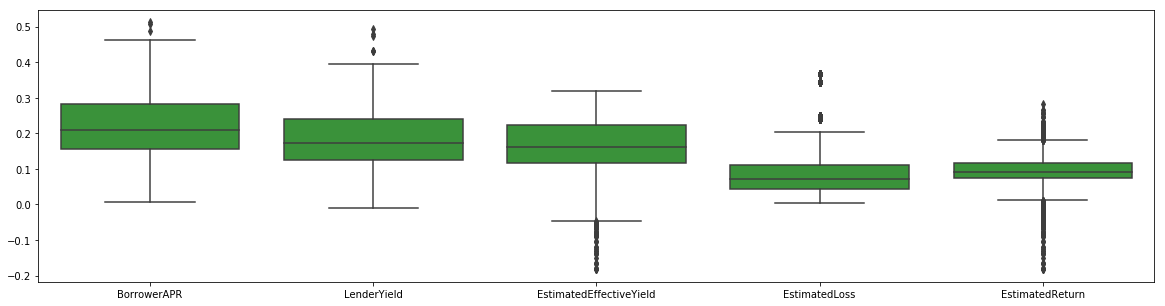

In [87]:
plt.figure(figsize=(20,5))
sb.boxplot(data=df_interest_character,color=base)

Why is there negative return? Query it to see detail...

In [88]:
df[df['EstimatedEffectiveYield']<0].loc[:,'ListingKey':'BorrowerState']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState
501,089C348555489823736377D,460749,2010-05-30 18:37:24.953,NaN,36,Chargedoff,2013-01-11 00:00:00,0.24807,0.2100,0.2000,-0.0013,0.1900,-0.0013,1.0,HR,5.0,7,OK
527,32543499181220496DBB555,483095,2010-11-05 14:46:00.163,NaN,36,Completed,2011-04-21 00:00:00,0.36783,0.3269,0.3169,-0.0677,0.3660,-0.0677,1.0,HR,1.0,1,CA
760,4685347195009875809A70E,440607,2010-01-01 14:46:53.843,NaN,36,Completed,2011-02-28 00:00:00,0.22491,0.2000,0.1900,-0.0006,0.1800,-0.0006,1.0,HR,5.0,1,AK
1321,6DD034810270651087DFB9F,452658,2010-04-05 09:10:40.280,NaN,36,Completed,2011-04-29 00:00:00,0.36336,0.3390,0.3290,-0.0354,0.3450,-0.0354,1.0,HR,1.0,3,FL
1349,0B5C34738042854656430E6,441714,2010-01-08 13:39:38.123,NaN,36,Chargedoff,2012-01-22 00:00:00,0.37453,0.3500,0.3400,-0.0251,0.3450,-0.0251,1.0,HR,1.0,7,VA
3686,421F3494976253733186DF9,477067,2010-09-25 12:10:55.217,NaN,36,Chargedoff,2011-05-10 00:00:00,0.38620,0.3490,0.3390,-0.0470,0.3660,-0.0470,1.0,HR,1.0,2,IL
4310,9E5E3498204991686FFFDC9,481925,2010-10-28 10:18:14.733,NaN,36,Completed,2011-05-13 00:00:00,0.34631,0.3100,0.3000,-0.0836,0.3660,-0.0836,1.0,HR,1.0,2,CA
4491,06C634936764915582779CD,474698,2010-09-07 07:57:07.080,NaN,36,Chargedoff,2013-05-18 00:00:00,0.37699,0.3400,0.3300,-0.0555,0.3660,-0.0555,1.0,HR,1.0,1,FL
4530,0F393487035940130A9724B,463090,2010-06-18 09:24:37.347,NaN,36,Completed,2011-02-18 00:00:00,0.33281,0.3089,0.2989,-0.0636,0.3450,-0.0636,1.0,HR,1.0,2,GA
5760,3AA83459022108282F14863,416980,2009-07-17 13:57:20.620,NaN,36,Completed,2012-05-23 00:00:00,0.37453,0.3500,0.3400,-0.0251,0.3450,-0.0251,1.0,HR,1.0,1,NJ


Most of it are from HR Rates... some are B rates

Did lots of defaul arise during 2007-2008 which causes loan to drop dramatically during 2009? compared to other year?

In [89]:
df_default=df[(df['LoanStatus']!='Completed')&(df['LoanStatus']!='Current')]

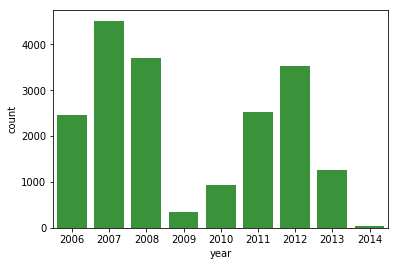

In [90]:
sb.countplot(data=df_default,x='year',color=base)

1. Credit rating and loan amount -- I want to see whether the risk of the platform lies on what end
2. Credit rating and Interest rate

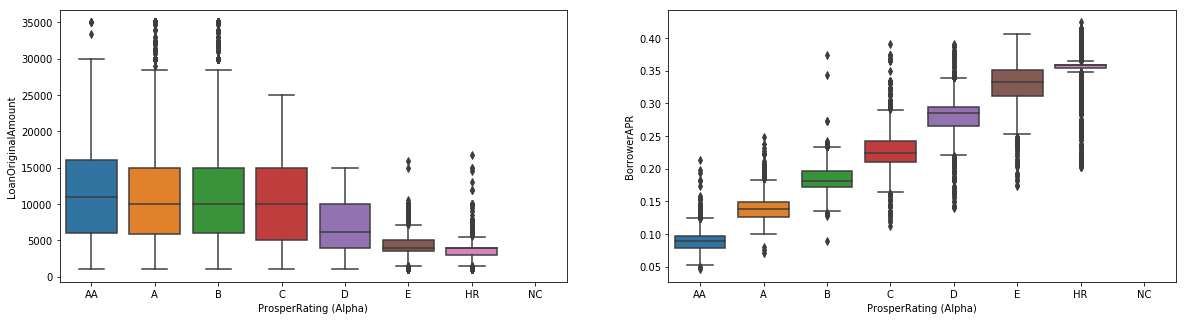

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax1=sb.boxplot(data=df,x='ProsperRating (Alpha)',y='LoanOriginalAmount')

plt.subplot(1,2,2)
sb.boxplot(data=df,x='ProsperRating (Alpha)',y='BorrowerAPR')


   > we can see that high rating loan get higher amount borrowed, this make sense

> The higheer the loan risk the higher the interest rate, this make sense

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. We could clearly see that the higher the rating the higher the platform are willing to give away loans, this work the same way too as higher rating are likely to receive lower rate beceaause their interest is much lower


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. at fist I was trying to plot the type of loan and count how many loan was orignate, and to understand about that more I include one more variable which's the average loan size. It seems to me that eventhough the largest category of amount is still debt consolidation, but the others are not ordering in their loan amount. For example the loan that are originate less # have higher amount borrowed.
2. We try to understand the relationship between the yield and see that the return given on the platform is not as high as what we think it would be.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Do the state that the borrower live drive the credit rate?

In [92]:
#create a new dataframe with only necessary information

df_clean_state=df_clean.copy()
df_clean_state.drop(df_clean_state.columns.difference(['ProsperRating (numeric)','StatedMonthlyIncome','DebtToIncomeRatio','BorrowerState']),1,inplace=True)

In [93]:
df_clean_state.head()

,ProsperRating (numeric),BorrowerState,DebtToIncomeRatio,StatedMonthlyIncome
0,NaN,CO,0.17,3083.333333
1,6.0,CO,0.18,6125.000000
2,NaN,GA,0.06,2083.333333
3,6.0,GA,0.15,2875.000000
4,3.0,MN,0.26,9583.333333


In [94]:
#using groupby to create a grouping
df_clean_state=df_clean_state.groupby('BorrowerState')[['ProsperRating (numeric)','StatedMonthlyIncome','DebtToIncomeRatio']].mean()

In [95]:
df_clean_state.reset_index(inplace=True)

In [96]:
df_clean_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
BorrowerState              51 non-null object
ProsperRating (numeric)    48 non-null float64
StatedMonthlyIncome        51 non-null float64
DebtToIncomeRatio          51 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [97]:
df_clean_state['StatedMonthlyIncome']=df_clean_state['StatedMonthlyIncome'].round(2)
df_clean_state['DebtToIncomeRatio']=df_clean_state['DebtToIncomeRatio'].round(2)
df_clean_state['ProsperRating (numeric)']=df_clean_state['ProsperRating (numeric)'].round(2)
df_clean_state.head()

,BorrowerState,ProsperRating (numeric),StatedMonthlyIncome,DebtToIncomeRatio
0,AK,4.10,5880.62,0.25
1,AL,3.82,4759.91,0.30
2,AR,3.80,4851.89,0.29
3,AZ,4.08,5347.03,0.26
4,CA,4.18,6184.83,0.26


In [98]:
#for col in df_clean_state.columns:
 #   df_clean_state[col] = df_clean_state[col].astype(str)

In [99]:
df_clean_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
BorrowerState              51 non-null object
ProsperRating (numeric)    48 non-null float64
StatedMonthlyIncome        51 non-null float64
DebtToIncomeRatio          51 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [102]:
for i in range(df_clean_state.shape[0]):
    df_clean_state['text'][i]= 'State: ' + str(df_clean_state['BorrowerState'][i]) + ' Rating '+ str(df_clean_state['ProsperRating (numeric)'][i])+' Debt To Income: '+ str(df_clean_state['DebtToIncomeRatio'][i])+ "Monthly Income: "+ str(df_clean_state['StatedMonthlyIncome'][i])

C:\Users\copter\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [103]:
df_clean_state

,BorrowerState,ProsperRating (numeric),StatedMonthlyIncome,DebtToIncomeRatio,text
0,AK,4.10,5880.62,0.25,State: AK Rating 4.1 Debt To Income: 0.25Month...
1,AL,3.82,4759.91,0.30,State: AL Rating 3.82 Debt To Income: 0.3Month...
2,AR,3.80,4851.89,0.29,State: AR Rating 3.8 Debt To Income: 0.29Month...
3,AZ,4.08,5347.03,0.26,State: AZ Rating 4.08 Debt To Income: 0.26Mont...
4,CA,4.18,6184.83,0.26,State: CA Rating 4.18 Debt To Income: 0.26Mont...
5,CO,4.12,5647.54,0.29,State: CO Rating 4.12 Debt To Income: 0.29Mont...
6,CT,4.16,7394.70,0.25,State: CT Rating 4.16 Debt To Income: 0.25Mont...
7,DC,4.55,6822.25,0.23,State: DC Rating 4.55 Debt To Income: 0.23Mont...
8,DE,4.34,5754.26,0.29,State: DE Rating 4.34 Debt To Income: 0.29Mont...
9,FL,4.01,5399.22,0.28,State: FL Rating 4.01 Debt To Income: 0.28Mont...


In [104]:
#by State

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]



data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df_clean_state['BorrowerState'],
    z = df_clean_state['ProsperRating (numeric)'].astype(float),
    locationmode = 'USA-states',
    text = df_clean_state['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Rating")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Rating By State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aircop/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


C:\Users\copter\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Credit rating and default -- but do the higher rating mean less default?

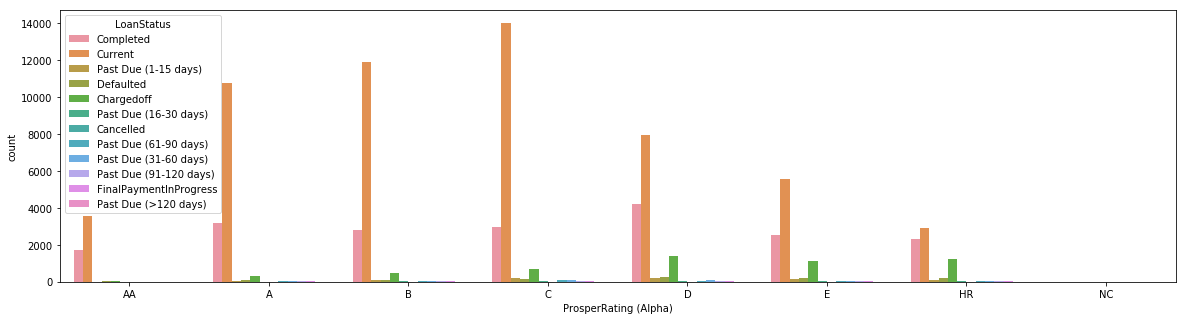

In [105]:
plt.figure(figsize=(20,5))
sb.countplot(data=df,x='ProsperRating (Alpha)',hue='LoanStatus')

This show the same sign as our univariate plot which shows that C has the most loan origination

This doesn't show a great detail of where the loan default most -- therefore we will categorize the data into more detail
1. Past due we will let it <90 days
2. NPL -- this will be a bucket  for past due >90 days
3. Final payment in progress and completed will be in the same bucket
4. Charged off is a loan in which they decide that it's not collectable therefore we would categorize it as the same level of defaulted
5. Current 
6. Cancelled will be remove from the category

In [106]:
df_clean['LoanCat']=df_clean['LoanStatus']

In [107]:
df_clean['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [108]:
df_clean.loc[df_clean['LoanCat']=="Past Due (1-15 days)",'LoanCat']="Past Due"
df_clean.loc[df_clean['LoanCat']=="Past Due (16-30 days)",'LoanCat']="Past Due"
df_clean.loc[df_clean['LoanCat']=="Past Due (31-60 days)",'LoanCat']="Past Due"
df_clean.loc[df_clean['LoanCat']=="Past Due (61-90 days)",'LoanCat']="Past Due"
df_clean.loc[df_clean['LoanCat']=="Past Due (90-120 days)",'LoanCat']="NPL"
df_clean.loc[df_clean['LoanCat']=="Past Due (>120 days)",'LoanCat']="NPL"
df_clean.loc[df_clean['LoanCat']=="FinalPaymentInProgress",'LoanCat']="Completed"

In [109]:
df_clean['LoanCat'].value_counts()

Current                   56576
Completed                 38279
Chargedoff                11992
Defaulted                  5018
Past Due                   1747
Past Due (91-120 days)      304
NPL                          16
Cancelled                     5
Name: LoanCat, dtype: int64

In [110]:
df_clean

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year,Amount_chunk,LoanCat
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.00,0.00,1.0000,0,0,0.0,258,2007,4.0,Completed
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,1.0000,0,0,0.0,1,2014,4.0,Current
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.00,0.00,1.0000,0,0,0.0,41,2007,1.0,Completed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.00,0.00,1.0000,0,0,0.0,158,2012,4.0,Current
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.00,0.00,1.0000,0,0,0.0,20,2013,7.0,Current
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,0.00,0.00,1.0000,0,0,0.0,1,2013,7.0,Current
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.00,0.00,1.0000,0,0,0.0,1,2013,1.0,Current
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,0.00,0.00,1.0000,0,0,0.0,1,2013,4.0,Current
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,0.00,0.00,1.0000,0,0,0.0,1,2013,4.0,Current
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,0.00,0.00,1.0000,0,0,0.0,1,2013,4.0,Current


Make it in to percent of earsier comparison

In [111]:
rating_cat=df_clean.groupby(['ProsperRating (Alpha)','LoanCat']).size()

In [112]:
rating_cat=rating_cat.reset_index(name="Count")
rating_cat.head()

,ProsperRating (Alpha),LoanCat,Count
0,AA,Chargedoff,63
1,AA,Completed,1713
2,AA,Current,3551
3,AA,Defaulted,20
4,AA,Past Due,19


In [113]:
sum_rating=rating_cat.groupby('ProsperRating (Alpha)')['Count'].sum()
sum_rating=sum_rating.reset_index()
sum_rating

,ProsperRating (Alpha),Count
0,AA,5372
1,A,14551
2,B,15581
3,C,18345
4,D,14274
5,E,9795
6,HR,6935
7,NC,0


In [114]:
A=sum_rating.iloc[0,1]
AA=sum_rating.iloc[1,1]
B=sum_rating.iloc[2,1]
C=sum_rating.iloc[3,1]
D=sum_rating.iloc[4,1]
E=sum_rating.iloc[5,1]
HR=sum_rating.iloc[6,1]

In [115]:
def set_percent(row):
    if row['ProsperRating (Alpha)']=="A":
        return row['Count']/A
    if row['ProsperRating (Alpha)']=="AA":
        return row['Count']/AA
    if row['ProsperRating (Alpha)']=="B":
        return row['Count']/B
    if row['ProsperRating (Alpha)']=="C":
        return row['Count']/C
    if row['ProsperRating (Alpha)']=="D":
        return row['Count']/D
    if row['ProsperRating (Alpha)']=="E":
        return row['Count']/E
    if row['ProsperRating (Alpha)']=="HR":
        return row['Count']/HR
rating_cat=rating_cat.assign(percent=rating_cat.apply(set_percent,axis=1))

In [116]:
rating_cat

,ProsperRating (Alpha),LoanCat,Count,percent
0,AA,Chargedoff,63,0.004330
1,AA,Completed,1713,0.117724
2,AA,Current,3551,0.244038
3,AA,Defaulted,20,0.001374
4,AA,Past Due,19,0.001306
5,AA,Past Due (91-120 days),6,0.000412
6,A,Chargedoff,326,0.060685
7,A,Completed,3237,0.602569
8,A,Current,10755,2.002048
9,A,Defaulted,79,0.014706


[Text(0, 0, '0.00%'),
 Text(0, 0, '25.00%'),
 Text(0, 0, '50.00%'),
 Text(0, 0, '75.00%'),
 Text(0, 0, '100.00%'),
 Text(0, 0, '125.00%'),
 Text(0, 0, '150.00%'),
 Text(0, 0, '175.00%'),
 Text(0, 0, '200.00%'),
 Text(0, 0, '225.00%')]

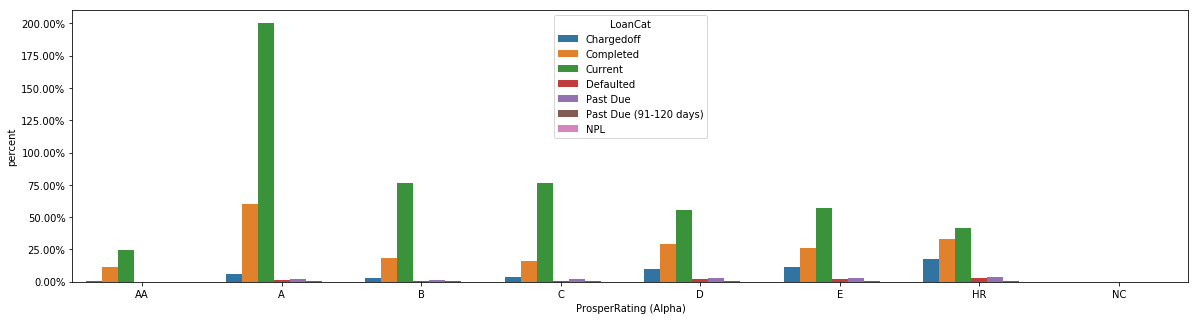

In [117]:
plt.figure(figsize=(20,5))
ax=sb.barplot(data=rating_cat,x='ProsperRating (Alpha)',y='percent',hue='LoanCat')
y_value=['{:,.2f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

The category with highest charge of are HR, the lowest charged off category are the A rating which make sense.
Moreover looking from the default rate and past due the percentage of the 

See the defualt rate of each category

In [118]:
default_cat=rating_cat[rating_cat['LoanCat']=="Defaulted"]

[Text(0, 0, '0.0%'),
 Text(0, 0, '0.5%'),
 Text(0, 0, '1.0%'),
 Text(0, 0, '1.5%'),
 Text(0, 0, '2.0%'),
 Text(0, 0, '2.5%'),
 Text(0, 0, '3.0%'),
 Text(0, 0, '3.5%')]

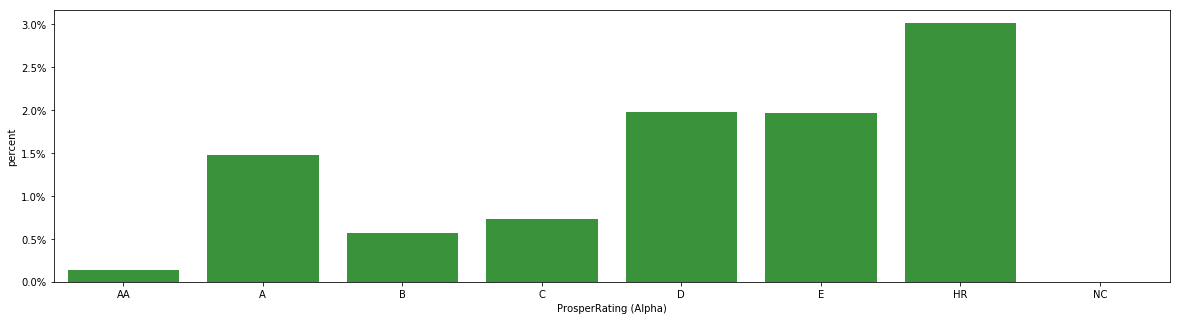

In [119]:
plt.figure(figsize=(20,5))
ax1=sb.barplot(data=default_cat,x='ProsperRating (Alpha)',y='percent',color=base)
y_value=['{:,.1f}'.format(x*100) + '%' for x in ax1.get_yticks()]

ax1.set_yticklabels(y_value)

See the credit rating (x)  vs.  Borrower APR -- by occupation
- see which occupation has lowest rating

In [120]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 84 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null category
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRatin

C:\Users\copter\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



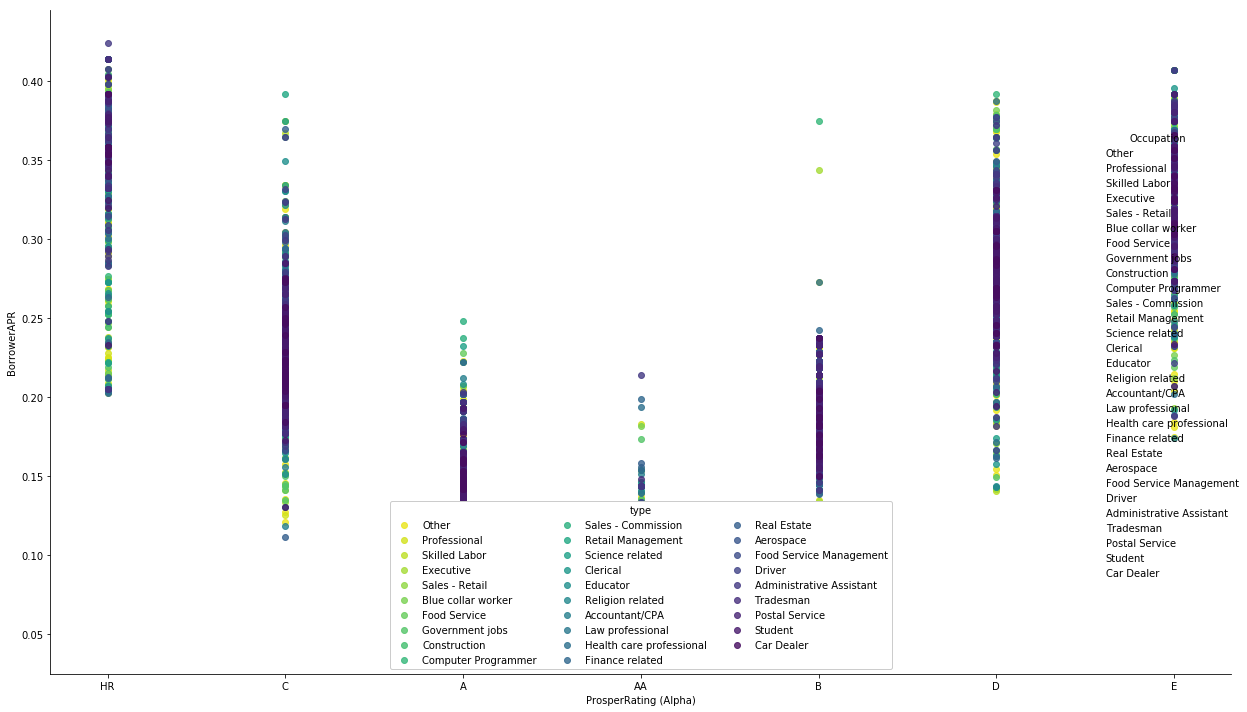

In [121]:
g=sb.FacetGrid(data=df_clean,hue='Occupation',size=10,aspect=1.5,palette='viridis_r')

g.add_legend()
g.map(sb.regplot,'ProsperRating (Alpha)','BorrowerAPR',fit_reg=False);

plt.legend(loc=8,ncol=3,framealpha=1,title='type')


Trying the above is very hard to understand from my point of view therefore trying different plotting style

C:\Users\copter\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



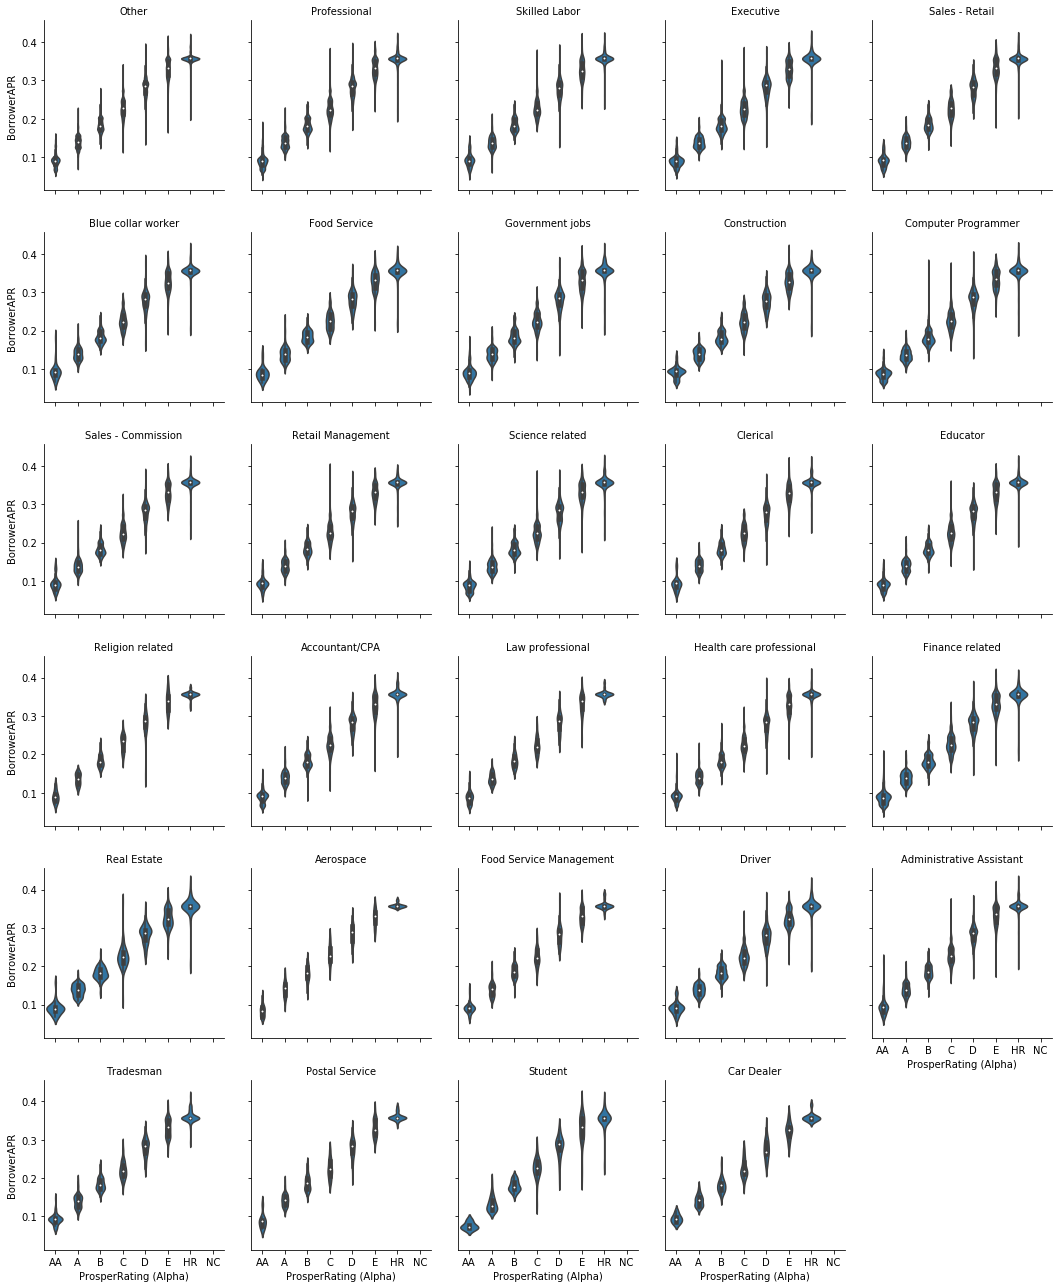

In [122]:
g=sb.FacetGrid(data=df_clean,col="Occupation",col_wrap=5)
g.map(sb.violinplot,'ProsperRating (Alpha)','BorrowerAPR')
g.set_titles('{col_name}')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The state that has higher income has propbability that the average rating of the state is higher
2. The higher the rating the lower % of default with in the rating
3. Occupation didn't effect the rating, given that the rating are evenly distribute within each and every occupation

### Were there any interesting or surprising interactions between features?

> 1. Interestingly the A grade has higher defualt percent than a loan rank in B grade  and C grade.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [123]:
df.to_csv('df.csv')
df_clean.to_csv('df_clean.csv')
amountc.to_csv('amountc.csv')
df_interest_character.to_csv('df_interest_character.csv')
df_default.to_csv('df_default.csv')
df_clean_state.to_csv('df_clean_state.csv')
rating_cat.to_csv('rating_cat.csv')
default_cat.to_csv('default_cat.csv')